# Задание 4

Эмпирическая корреляционная 5х5 матрица дневных логарифмических доходностей всех компаний варианта за весь период (коэффициенты корреляции округляются до 0,001). Период может быть сужен при отсутствии данных.

In [13]:
import IPython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [14]:
%%javascript
var k = IPython.notebook.kernel;
k.execute('this_nb_name_ext = "' + IPython.notebook.notebook_name + '"');

<IPython.core.display.Javascript object>

In [15]:
def thisfname(): #Имя этого блокнота
    this_notebook_name = os.path.splitext(this_nb_name_ext)[0]
    return this_notebook_name

In [16]:
tickers = ['AKRN', 'APTK', 'CHMK', 'LKOH', 'SBER'] # Тикеры
myDataPath = 'C:/Users/timha/OneDrive/Рабочий стол/лаба/' # путь к файлам

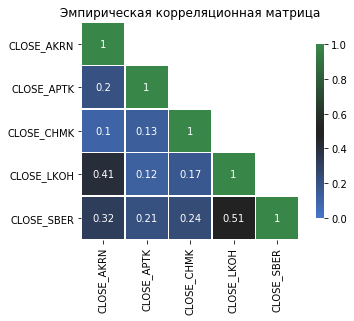

In [17]:
# чтение и преобразование файла
def read_exp(file, ticker):
    df = pd.DataFrame()
    csvtab = pd.read_csv(file, sep = ',' , engine='python') # чтение файла
    df['DATA_' + ticker] = pd.to_datetime(csvtab['<DATE>'], format='%Y%m%d')
    df['CLOSE_' + ticker] = csvtab['<CLOSE>']
    df.set_index('DATA_' + ticker, inplace = True)
    return df

# красивый вывод ковариационной матрицы
def pretty_corr(newtab):
    mask = np.zeros_like(newtab)
#     print(np.triu_indices_from(mask))
    mask[np.triu_indices_from(mask, +1)] = True
    cmap = sns.diverging_palette(255, 133, center="dark", as_cmap = True)
    ax = sns.heatmap(
        newtab, 
        vmin=0, vmax=1, 
        annot=True, 
        mask = mask,
        cmap = cmap,
        square=True,
        linewidths=.5, 
        cbar_kws={"shrink": .8}
    )
    ax
    plt.title('Эмпирическая корреляционная матрица')
    plt.show()

# чтение файлов
df_AKRN = df_APTK = df_CHMK = df_LKOH = df_SBER = pd.DataFrame()
list_of_data = [df_AKRN, df_APTK, df_CHMK, df_LKOH, df_SBER]
# преобразуем для concat
for i in range(len(list_of_data)):
    list_of_data[i] = read_exp(myDataPath + tickers[i] + '.txt', tickers[i])
# соединяем все таблицы в одну
newtab = pd.concat(list_of_data, join='inner', axis = 1) # таблица не содержащая пропусков
newtab = np.log(newtab.divide(newtab.shift(+1))) # логарифмическая доходность
newtab = newtab.dropna() # удаление NaN
newtab = round(newtab.corr(method='pearson'), 3) # коэффициент корреляции с округлением
pretty_corr(newtab)

In [18]:
newtab.to_csv(thisfname() + ".Эмпирическая Корр Матр ЛД.csv", index=False, decimal=',', sep=';', encoding='utf-8-sig')